In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# DATASET:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


This is the overall dataset having 7043 rows and 21 columns from which churn is the target vraible. We will have to build Classification to predict the customer churn is yes or no. dataset having both object and numerical data. Here customer Id does not play any role while predicting the churn so I will drop that column.

In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


here are the total columns and thier names. Most of the columns have object data.

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


here we can statistical information about the columns having numerical data.

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Our data does not contain any null values. 

In [7]:
df.drop(['customerID'],axis=1,inplace=True)

In [8]:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        print('*********************************************************')
        

gender:['Female' 'Male']
Male      3555
Female    3488
Name: gender, dtype: int64
*********************************************************
Partner:['Yes' 'No']
No     3641
Yes    3402
Name: Partner, dtype: int64
*********************************************************
Dependents:['No' 'Yes']
No     4933
Yes    2110
Name: Dependents, dtype: int64
*********************************************************
PhoneService:['No' 'Yes']
Yes    6361
No      682
Name: PhoneService, dtype: int64
*********************************************************
MultipleLines:['No phone service' 'No' 'Yes']
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
*********************************************************
InternetService:['DSL' 'Fiber optic' 'No']
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
*********************************************************
OnlineSecurity:['No' 'Yes' 'No internet s

This the overall information about object data.All object datatype columns except TotalCharges contian categorical data.


# DATA VISIUALIZATION;

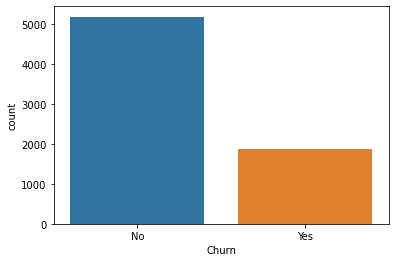

In [9]:
sns.countplot(df['Churn']);

This the target variable dataset count in graph.It clearly shows the data has imbalanced count. Will have to make it balance while processing on dataset.

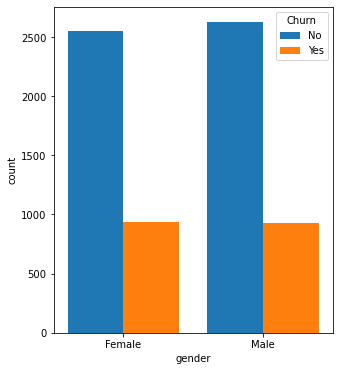

In [10]:
plt.figure(figsize=(5,6))
sns.countplot(df['gender'], hue=df['Churn'],saturation=1,)
plt.show()

Here Geneder data is balanced while comparing with chrun. so from above bargraph we can say gender would not affect o churn.

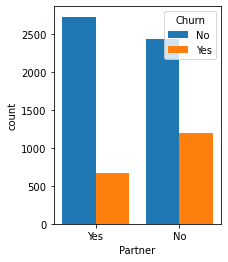

In [11]:
plt.figure(figsize=(3,4))
sns.countplot(df['Partner'], hue=df['Churn'],saturation=1,)
plt.show()

from above plot if the customer is partner of the company then it may stay longer time.

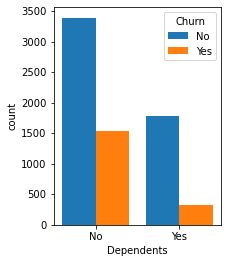

In [12]:
plt.figure(figsize=(3,4))
sns.countplot(df['Dependents'], hue=df['Churn'],saturation=1,)
plt.show()

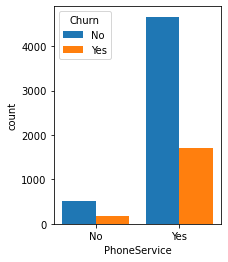

In [13]:
plt.figure(figsize=(3,4))
sns.countplot(df['PhoneService'], hue=df['Churn'],saturation=1,)
plt.show()

Phone service is also paying important role if the company gives that services customer contiue thier business with company

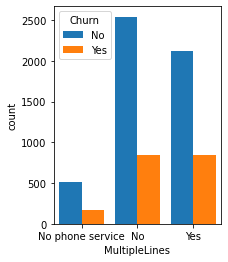

In [14]:
plt.figure(figsize=(3,4))
sns.countplot(df['MultipleLines'], hue=df['Churn'],saturation=1,)
plt.show()

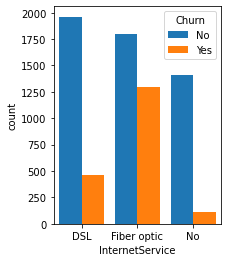

In [15]:
plt.figure(figsize=(3,4))
sns.countplot(df['InternetService'], hue=df['Churn'],saturation=1,)
plt.show()

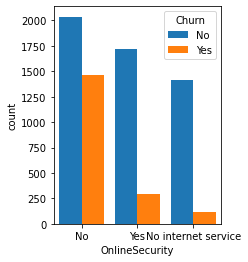

In [16]:
plt.figure(figsize=(3,4))
sns.countplot(df['OnlineSecurity'], hue=df['Churn'],saturation=1,)
plt.show()

Online secuirty is also very important if he company gives online security there is possibility of customer churn.

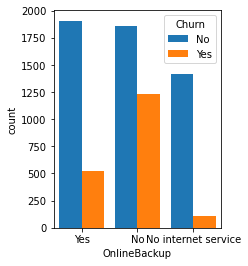

In [17]:
plt.figure(figsize=(3,4))
sns.countplot(df['OnlineBackup'], hue=df['Churn'],saturation=1,)
plt.show()

<AxesSubplot:xlabel='DeviceProtection', ylabel='Count'>

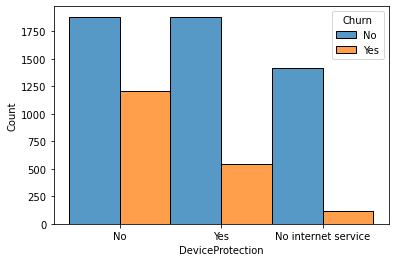

In [18]:
sns.histplot(x='DeviceProtection',hue='Churn',data=df,multiple='dodge')

<AxesSubplot:xlabel='TechSupport', ylabel='Count'>

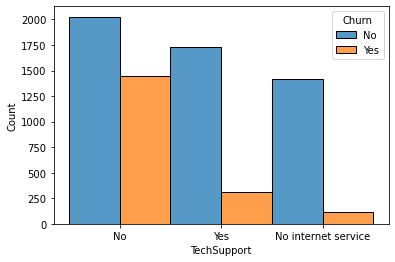

In [19]:
sns.histplot(x='TechSupport',hue='Churn',data=df,multiple='dodge')

<AxesSubplot:xlabel='StreamingTV', ylabel='Count'>

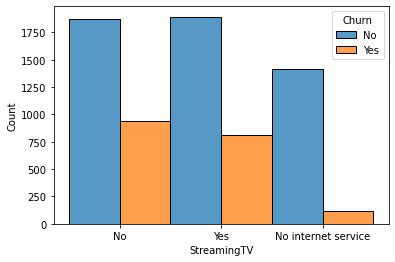

In [20]:
sns.histplot(x='StreamingTV',hue='Churn',data=df,multiple='dodge')

<function matplotlib.pyplot.show(close=None, block=None)>

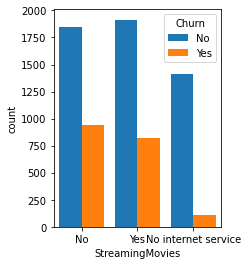

In [21]:
plt.figure(figsize=(3,4))
sns.countplot(df['StreamingMovies'], hue=df['Churn'],saturation=1,)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

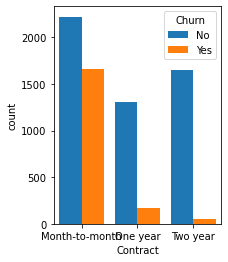

In [22]:
plt.figure(figsize=(3,4))
sns.countplot(df['Contract'], hue=df['Churn'],saturation=1,)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

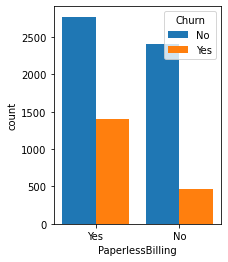

In [23]:
plt.figure(figsize=(3,4))
sns.countplot(df['PaperlessBilling'], hue=df['Churn'],saturation=1,)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

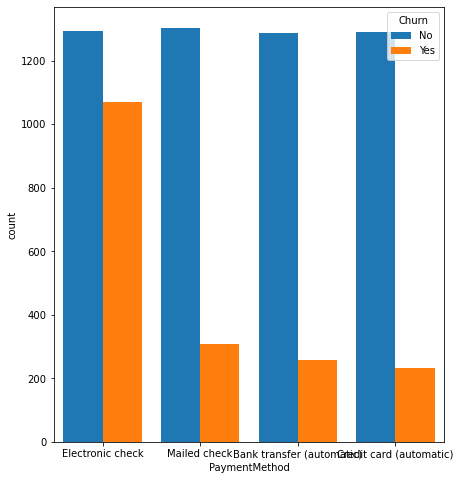

In [24]:
plt.figure(figsize=(7,8))
sns.countplot(df['PaymentMethod'], hue=df['Churn'],saturation=1,)
plt.show

from above the above all distribution I can say if the company is providing digital services,online security, secure payment gateway then custmoers stay longer.

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [27]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


Here I have Converted the object data into numerical .

In [28]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.090756,-0.195525


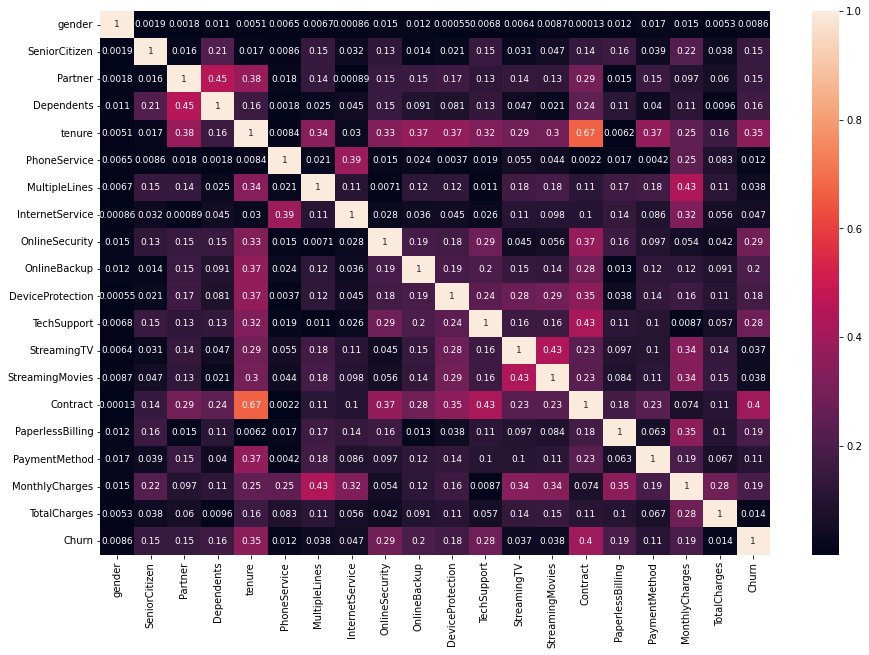

In [29]:
df_corr = df.corr().abs()

plt.figure(figsize =(15,10))
sns.heatmap(df_corr,annot = True, annot_kws={'size':9})
plt.show()

from above corelation heatmap Contract and Tenure are highly corelated.Tenure is also corealted with churn.and also Gender is not much corealted with other columns and target variable also. So i will drop the tenure and gender columns. 

Text(0.5, 1.0, 'Scatter plot to show Relation between tenure and contract')

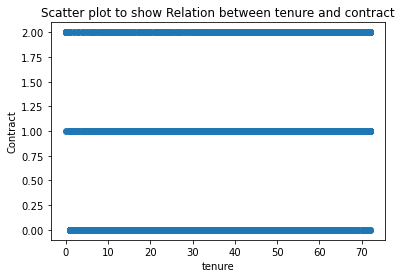

In [30]:
plt.scatter(df['tenure'],df['Contract'])
plt.xlabel('tenure')
plt.ylabel('Contract')
plt.title('Scatter plot to show Relation between tenure and contract')


Here we can see the relation for this two tenure and contract.multicolinearity exist here . So I am dropping tenure column. 

In [31]:
df.drop(['gender','tenure'],axis=1,inplace=True)
df

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


So now we have total 18 columns. I will build my model using this final 17 features.

In [32]:
X=df.drop('Churn',axis=1)
y= df['Churn']

In [33]:
X

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597
7039,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698
7040,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994
7041,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660


In [34]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [50]:
from sklearn.ensemble import ExtraTreesClassifier
Ext = ExtraTreesClassifier(random_state=50)

In [51]:
Ext.fit(X, y)

ExtraTreesClassifier(random_state=50)

In [53]:
feature_imp = Ext.feature_importances_

In [54]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 2.73
1 3.03
2 2.55
3 0.68
4 2.98
5 3.47
6 4.79
7 3.07
8 3.33
9 4.28
10 2.46
11 2.44
12 10.6
13 3.09
14 7.6
15 20.71
16 22.19


In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int32  
 2   Dependents        7043 non-null   int32  
 3   PhoneService      7043 non-null   int32  
 4   MultipleLines     7043 non-null   int32  
 5   InternetService   7043 non-null   int32  
 6   OnlineSecurity    7043 non-null   int32  
 7   OnlineBackup      7043 non-null   int32  
 8   DeviceProtection  7043 non-null   int32  
 9   TechSupport       7043 non-null   int32  
 10  StreamingTV       7043 non-null   int32  
 11  StreamingMovies   7043 non-null   int32  
 12  Contract          7043 non-null   int32  
 13  PaperlessBilling  7043 non-null   int32  
 14  PaymentMethod     7043 non-null   int32  
 15  MonthlyCharges    7043 non-null   float64
 16  TotalCharges      7043 non-null   int32  


In [57]:
X=X.drop(['SeniorCitizen','PhoneService','Dependents','StreamingTV','StreamingMovies'],axis=1)
X

,Partner,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,1,0,0,2,0,0,0,1,2,29.85,2505
1,0,0,0,2,0,2,0,1,0,3,56.95,1466
2,0,0,0,2,2,0,0,0,1,3,53.85,157
3,0,1,0,2,0,2,2,1,0,0,42.30,1400
4,0,0,1,0,0,0,0,0,1,2,70.70,925
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,2,0,2,0,2,2,1,1,3,84.80,1597
7039,1,2,1,0,2,2,0,1,1,1,103.20,5698
7040,1,1,0,2,0,0,0,0,1,2,29.60,2994
7041,1,2,1,0,0,0,0,0,1,3,74.40,2660


Here I have keep the columns which are important.

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
SMOTE()

SMOTE()

In [60]:
x_train,x_test,y_train,y_test = train_test_split(X,y)

In [61]:
from collections import Counter
ove_smp = SMOTE(0.75)
x_train_s,y_train_s = ove_smp.fit_resample(x_train,y_train)
print('the number of the classes before fit {}'.format(Counter(y_train)))
print('the number of the classes after fit {}'.format(Counter(y_train_s)))

the number of the classes before fit Counter({0: 3877, 1: 1405})
the number of the classes after fit Counter({0: 3877, 1: 2907})


here I have balanced the count for target vraible chrun using Oversampling Method.

# MODEL BUILDING:

In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [63]:
MaxAccu=0
MaxR=0
for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = i,test_size = 0.20)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    acc=accuracy_score(y_test,pred_test)
    print('accuracy',acc,'random_state',i)
    
    if acc>MaxAccu:
        MaxAccu = acc
        MaxR=i
        print('accuracy',MaxAccu,'random_state',i)

accuracy 0.7700496806245565 random_state 0
accuracy 0.7700496806245565 random_state 0
accuracy 0.7856635911994322 random_state 1
accuracy 0.7856635911994322 random_state 1
accuracy 0.7750177430801988 random_state 2
accuracy 0.7856635911994322 random_state 3
accuracy 0.7579843860894251 random_state 4
accuracy 0.7700496806245565 random_state 5
accuracy 0.7828246983676366 random_state 6
accuracy 0.7877927608232789 random_state 7
accuracy 0.7877927608232789 random_state 7
accuracy 0.7650816181689141 random_state 8
accuracy 0.758694109297374 random_state 9
accuracy 0.7693399574166075 random_state 10
accuracy 0.7899219304471257 random_state 11
accuracy 0.7899219304471257 random_state 11
accuracy 0.7771469127040455 random_state 12
accuracy 0.7885024840312278 random_state 13
accuracy 0.7856635911994322 random_state 14
accuracy 0.7814052519517388 random_state 15
accuracy 0.7835344215755855 random_state 16
accuracy 0.7672107877927609 random_state 17
accuracy 0.7920511000709723 random_state 18
ac

In [64]:
print('Best Acuracy',MaxAccu,'Random State',MaxR)

Best Acuracy 0.8055358410220014 Random State 43


here logistict regression is giving 80% accuracy.at random state124.

In [66]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 43,test_size = 0.20)

In [67]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      1039
           1       0.26      0.22      0.24       370

    accuracy                           0.63      1409
   macro avg       0.50      0.50      0.50      1409
weighted avg       0.61      0.63      0.62      1409



In [68]:
print(confusion_matrix(y_test,pred_test))

[[812 227]
 [290  80]]


In [69]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
predt = dt.predict(x_test)
print('Accuracy',accuracy_score(y_test,predt))
print(confusion_matrix(y_test,predt))
print(classification_report(y_test,predt))

Accuracy 0.7246273953158269
[[833 206]
 [182 188]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1039
           1       0.48      0.51      0.49       370

    accuracy                           0.72      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.72      0.73      1409



In [70]:
from sklearn.ensemble import RandomForestClassifier

rt = RandomForestClassifier()
rt.fit(x_train,y_train)
prert = rt.predict(x_test)
print('Accuracy',accuracy_score(y_test,prert))
print(confusion_matrix(y_test,prert))
print(classification_report(y_test,prert))

Accuracy 0.7608232789212207
[[899 140]
 [197 173]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1039
           1       0.55      0.47      0.51       370

    accuracy                           0.76      1409
   macro avg       0.69      0.67      0.67      1409
weighted avg       0.75      0.76      0.75      1409



In [71]:
from sklearn.svm import SVC

st = SVC()
st.fit(x_train,y_train)
prest = st.predict(x_test)
print('Accuracy',accuracy_score(y_test,prest))
print(confusion_matrix(y_test,prest))
print(classification_report(y_test,prest))

Accuracy 0.7374024130589071
[[1039    0]
 [ 370    0]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1039
           1       0.00      0.00      0.00       370

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.63      1409



In [72]:
from sklearn.ensemble import AdaBoostClassifier

at = AdaBoostClassifier()
at.fit(x_train,y_train)
preat = at.predict(x_test)
print('Accuracy',accuracy_score(y_test,preat))
print(confusion_matrix(y_test,preat))
print(classification_report(y_test,preat))


Accuracy 0.8005677785663591
[[923 116]
 [165 205]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1039
           1       0.64      0.55      0.59       370

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



In [73]:
from sklearn.ensemble import BaggingClassifier

bt = BaggingClassifier()
bt.fit(x_train,y_train)
prebt = bt.predict(x_test)
print('Accuracy',accuracy_score(y_test,prebt))
print(confusion_matrix(y_test,prebt))
print(classification_report(y_test,prebt))

Accuracy 0.7743080198722498
[[927 112]
 [206 164]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1039
           1       0.59      0.44      0.51       370

    accuracy                           0.77      1409
   macro avg       0.71      0.67      0.68      1409
weighted avg       0.76      0.77      0.76      1409



In [75]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(x_train,y_train)
prext = xgb.predict(x_test)
print('Accuracy',accuracy_score(y_test,prext))
print(confusion_matrix(y_test,prext))
print(classification_report(y_test,prext))


Accuracy 0.7984386089425124
[[919 120]
 [164 206]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1039
           1       0.63      0.56      0.59       370

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
prekt = knn.predict(x_test)
print('Accuracy',accuracy_score(y_test,prekt))
print(confusion_matrix(y_test,prekt))
print(classification_report(y_test,prekt))


Accuracy 0.730305180979418
[[899 140]
 [240 130]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1039
           1       0.48      0.35      0.41       370

    accuracy                           0.73      1409
   macro avg       0.64      0.61      0.62      1409
weighted avg       0.71      0.73      0.72      1409



from above models Logistic regression is giving high accuracy and adaboost Regressor also. but SVC Giving false positive rate 0 which good for the model ,
so I will check cross validation score for adaboost,logistic and svc models.

# CROSS VALIDATION:

In [77]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lr,X,y,cv=3)
print("Cross Validation Score for Logistic Classification Model is:-",scr.mean())

Cross Validation Score for Logistic Classification Model is:- 0.7785034092116097


In [93]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(at,X,y,cv=3)
print("Cross Validation Score for AdaboostClassifier Model is:-",scr.mean())

Cross Validation Score for AdaboostClassifier Model is:- 0.7841836945783845


In [79]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(st,X,y,cv=3)
print("Cross Validation Score for SVC Model is:-",scr.mean())

Cross Validation Score for SVC Model is:- 0.7346301185052165


From above cross validation scores I can see the SVC is giving good cross validation score which is closer to model score.

# HYPERPARAMETER TUNING:

In [82]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.734 total time=   3.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.734 total time=   3.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.734 total time=   3.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.734 total time=   3.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.734 total time=   3.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.734 total time=   3.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.734 total time=   3.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.734 total time=   3.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.734 total time=   3.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.734 total time=   3.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.736 total time=   2.9s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [83]:
print(grid.best_params_)
 

print(grid.best_estimator_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.0001)


In [85]:
grid_predictions = grid.predict(x_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))


              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1039
           1       0.61      0.34      0.43       370

    accuracy                           0.77      1409
   macro avg       0.70      0.63      0.64      1409
weighted avg       0.75      0.77      0.74      1409



Here SVC is giving 77% score after applying hyperparameter tuning.

Now i will apply hyperparameter on Adaboost Regressor also as its also giving good corss validation score.

In [96]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10,11,12,14,15],'learning_rate':[2.1,0.2,0.10,1.0]}


In [97]:
GCV = GridSearchCV(AdaBoostClassifier(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'learning_rate': 1.0, 'n_estimators': 15}

In [98]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [99]:
GCV.best_estimator_

AdaBoostClassifier(n_estimators=15)

In [101]:
GCV_pred = GCV.best_estimator_.predict(x_test)
print(accuracy_score(y_test,GCV_pred))
print(classification_report(y_test,GCV_pred))
print(confusion_matrix(y_test,GCV_pred))

0.7963094393186657
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1039
           1       0.63      0.55      0.59       370

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409

[[918 121]
 [166 204]]


Adaboost is giving good accuracy than SVC Which is 80%

# AUC ROC CURVE:

<function matplotlib.pyplot.show(close=None, block=None)>

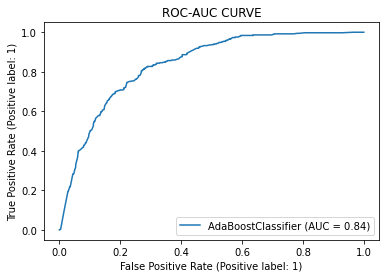

In [102]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('ROC-AUC CURVE')
plt.show

for adaboost area under the curve is 84%. so i am finialising Adaboost is my final model and saving it.

In [104]:
import pickle
file = open('CustomerChurn_model.pkl', 'wb')
pickle.dump(GCV.best_estimator_, file)
model=open('CustomerChurn_model.pkl', 'rb')
CustomerChurn_moel=pickle.load(model)